# *Salary Prediction of Data Professions*

# *Dataset Overview:*

The dataset contains the following columns:

- `FIRST NAME`: First name
- `LAST NAME`: Last name
- `SEX`: Gender
- `DOJ`: Date of joining the company
- `CURRENT DATE`: Current date of data
- `DESIGNATION`: Job role/designation
- `AGE`: Age
- `SALARY`: Target variable, the salary of the data professional
- `UNIT`: Business unit or department
- `LEAVES USED`: Number of leaves used
- `LEAVES REMAINING`: Number of leaves remaining
- `RATINGS`: Ratings or performance ratings
- `PAST EXP`: Past work experience

# *The Necessary Libraries are Imported*

In [1]:
#Import necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Import machine learning libraries for modeling and preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [2]:
#Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# *Importing Data*

In [3]:
#Read the dataset and display a random sample
df=pd.read_csv("Salary Prediction of Data Professions.csv")
df.sample(10)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
217,KENT,ACKMANN,M,6-21-2014,01-07-2016,Analyst,22.0,42440,Marketing,19.0,11.0,3.0,0
1225,PRESTON,ADDERLEY,M,12-17-2014,01-07-2016,Analyst,21.0,41124,Operations,17.0,13.0,3.0,0
1507,MAURINE,ARENDALL,F,10-11-2014,01-07-2016,Analyst,22.0,45528,Operations,25.0,5.0,4.0,0
638,MARTIN,ABDOU,M,02-01-2012,01-07-2016,Senior Analyst,25.0,61353,IT,22.0,8.0,2.0,0
25,HARRIETTE,ARMSTRONG,F,1-22-2014,01-07-2016,Analyst,23.0,48102,Marketing,17.0,13.0,2.0,0
1973,DENISE,ALSTAD,F,01-03-2014,01-07-2016,Analyst,25.0,48923,Management,29.0,1.0,3.0,2
187,LOUELLA,ARBRY,F,06-04-2012,01-07-2016,Senior Analyst,28.0,68432,IT,30.0,0.0,2.0,0
1304,WHITNEY,AMORIN,F,05-07-2014,01-07-2016,Analyst,22.0,43548,Management,21.0,9.0,3.0,0
1817,WADE,ACOR,M,06-12-2013,01-07-2016,Senior Analyst,26.0,54987,Marketing,25.0,5.0,3.0,1
1455,JERRI,ANTONSON,F,5-29-2013,01-07-2016,Analyst,23.0,49437,Finance,23.0,7.0,2.0,0


# *Data Understanding*

In [4]:
#Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


In [5]:
#Display summary statistics for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,2636.0,24.756449,3.908228,21.0,22.0,24.0,25.0,45.0
SALARY,2639.0,58136.678287,36876.956944,40001.0,43418.0,46781.0,51401.5,388112.0
LEAVES USED,2636.0,22.501517,4.604469,15.0,19.0,22.0,26.0,30.0
LEAVES REMAINING,2637.0,7.503223,4.603193,0.0,4.0,8.0,11.0,15.0
RATINGS,2637.0,3.486159,1.114933,2.0,2.0,3.0,4.0,5.0
PAST EXP,2639.0,1.566881,2.728416,0.0,0.0,1.0,2.0,23.0


In [6]:
#Display summary statistics for categorical columns
df.describe(include=['object']).T

,count,unique,top,freq
FIRST NAME,2639,2367,ELISHA,3
LAST NAME,2637,2475,AHHEE,2
SEX,2639,2,F,1344
DOJ,2638,967,10-19-2013,12
CURRENT DATE,2639,1,01-07-2016,2639
DESIGNATION,2639,6,Analyst,1949
UNIT,2639,6,IT,461


In [7]:
#Display the column names
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

In [8]:
#Display the shape of the dataset
df.shape

(2639, 13)

# *Converting necessary column to datetime object*

In [9]:
#Convert 'DOJ' and 'CURRENT DATE' columns to datetime format
df['DOJ']=pd.to_datetime(df['DOJ'])
df['CURRENT DATE']=pd.to_datetime(df['CURRENT DATE'])

In [10]:
#Display data types of columns
df.dtypes

FIRST NAME                  object
LAST NAME                   object
SEX                         object
DOJ                 datetime64[ns]
CURRENT DATE        datetime64[ns]
DESIGNATION                 object
AGE                        float64
SALARY                       int64
UNIT                        object
LEAVES USED                float64
LEAVES REMAINING           float64
RATINGS                    float64
PAST EXP                     int64
dtype: object

# *Handling Missing Value*

In [11]:
#Check for missing values
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [12]:
#Drop rows with missing values
df.dropna(inplace=True)
df.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

# *Checking for Duplicates*

In [13]:
#Check for duplicate rows
df[df.duplicated()].count()

FIRST NAME          161
LAST NAME           161
SEX                 161
DOJ                 161
CURRENT DATE        161
DESIGNATION         161
AGE                 161
SALARY              161
UNIT                161
LEAVES USED         161
LEAVES REMAINING    161
RATINGS             161
PAST EXP            161
dtype: int64

In [14]:
#Remove duplicate rows
df.drop_duplicates(inplace=True,keep='first')
df[df.duplicated()].count()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

In [15]:
#Display the count of non-null values in each column
df.count()

FIRST NAME          2470
LAST NAME           2470
SEX                 2470
DOJ                 2470
CURRENT DATE        2470
DESIGNATION         2470
AGE                 2470
SALARY              2470
UNIT                2470
LEAVES USED         2470
LEAVES REMAINING    2470
RATINGS             2470
PAST EXP            2470
dtype: int64

# *Exploratory Data Analysis*

In [16]:
#Calculate correlation matrix
df.corr()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
AGE,1.000000,0.869357,0.004794,-0.004794,0.033534,0.903694
SALARY,0.869357,1.000000,0.004596,-0.004596,0.016123,0.851026
LEAVES USED,0.004794,0.004596,1.000000,-1.000000,0.004866,0.003854
LEAVES REMAINING,-0.004794,-0.004596,-1.000000,1.000000,-0.004866,-0.003854
RATINGS,0.033534,0.016123,0.004866,-0.004866,1.000000,0.036397
PAST EXP,0.903694,0.851026,0.003854,-0.003854,0.036397,1.000000


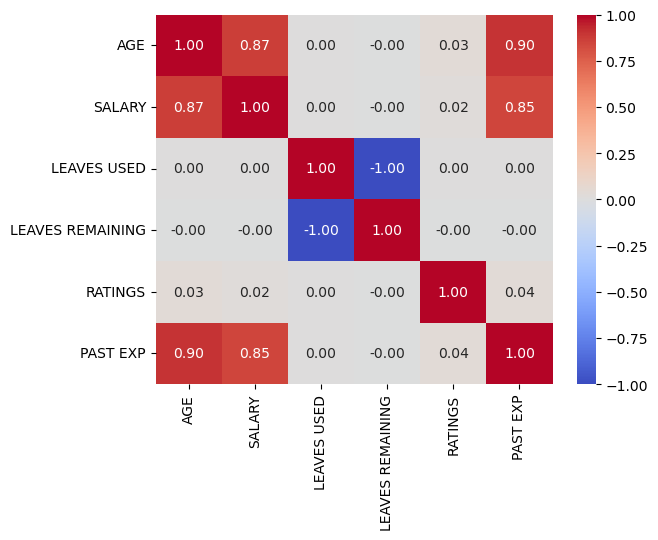

In [17]:
#Visualize correlation matrix with a heatmap
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.show()

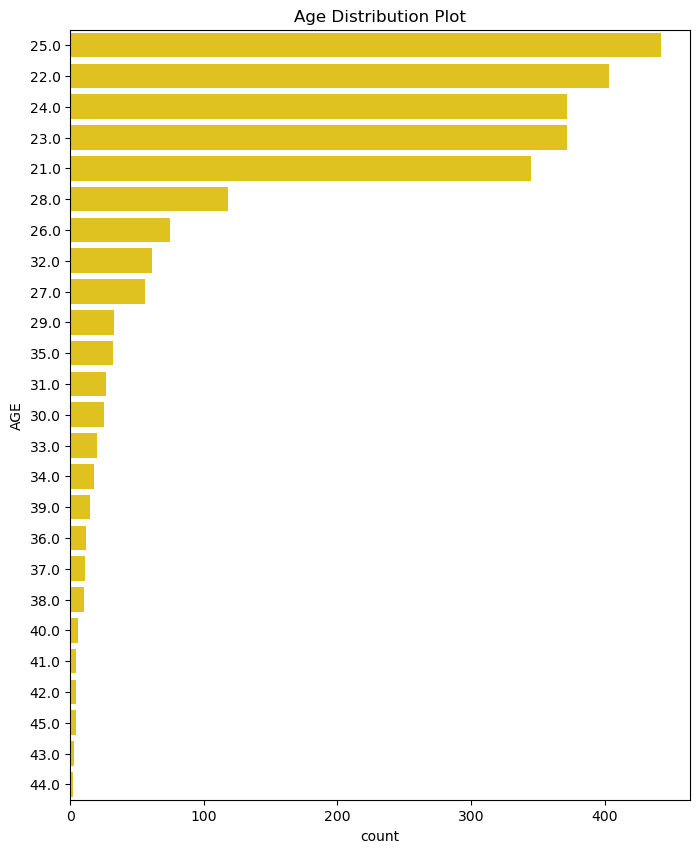

In [18]:
#Plotting the count distribution of ages
plt.figure(figsize=(8,10))
sns.countplot(y='AGE',data=df,order=df['AGE'].value_counts().index,color='gold')
plt.title("Age Distribution Plot")
plt.show()

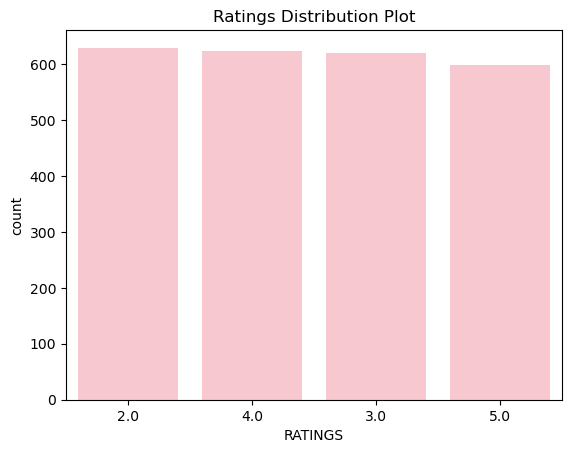

In [19]:
#Plotting the count distribution of ratings
sns.countplot(x='RATINGS',data=df,order=df['RATINGS'].value_counts().index,color='Pink')
plt.title("Ratings Distribution Plot")
plt.show()

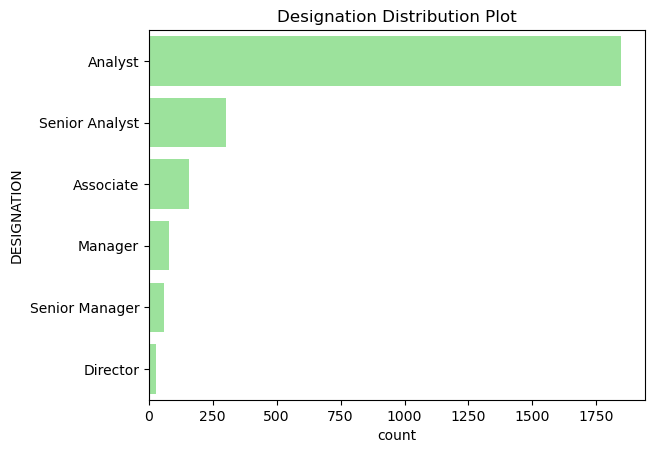

In [20]:
#Plotting the count distribution of designations
sns.countplot(y='DESIGNATION',data=df,order=df['DESIGNATION'].value_counts().index,color='LightGreen')
plt.title("Designation Distribution Plot")
plt.show()

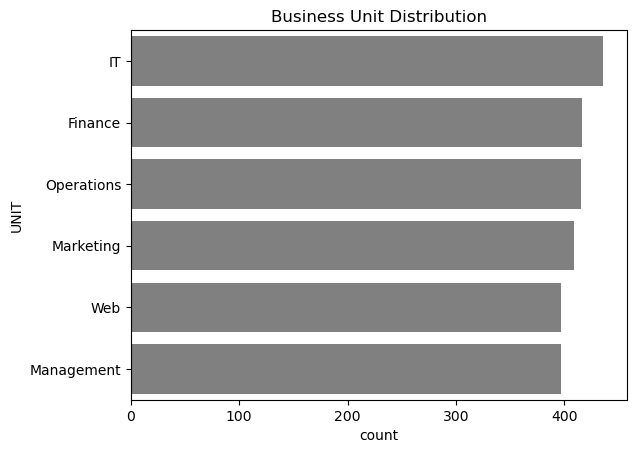

In [21]:
#Plotting the count distribution of business units
sns.countplot(y='UNIT',data=df,order=df['UNIT'].value_counts().index,color='Grey')
plt.title("Business Unit Distribution")
plt.show()

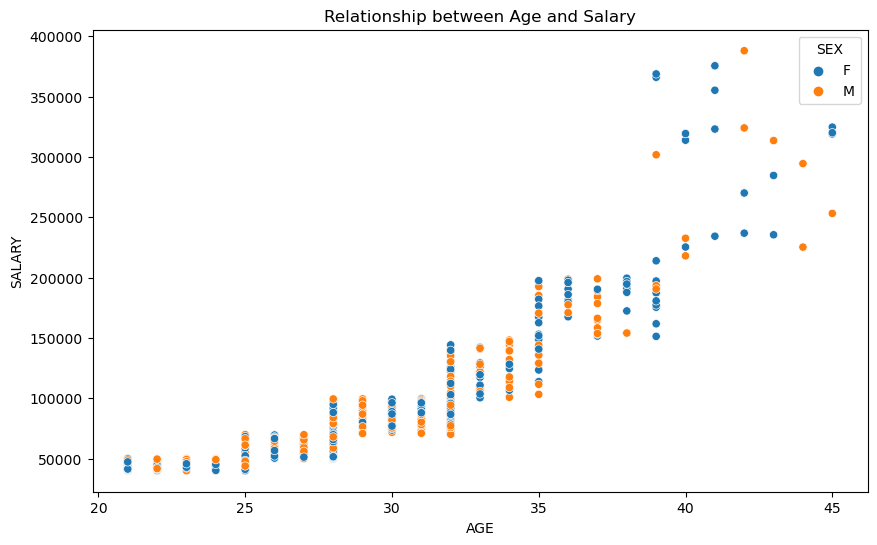

In [22]:
#Visualize the relationship between 'AGE' and 'SALARY'
plt.figure(figsize=(10,6))
sns.scatterplot(x='AGE',y='SALARY',data=df,hue='SEX')
plt.title('Relationship between Age and Salary')
plt.show()

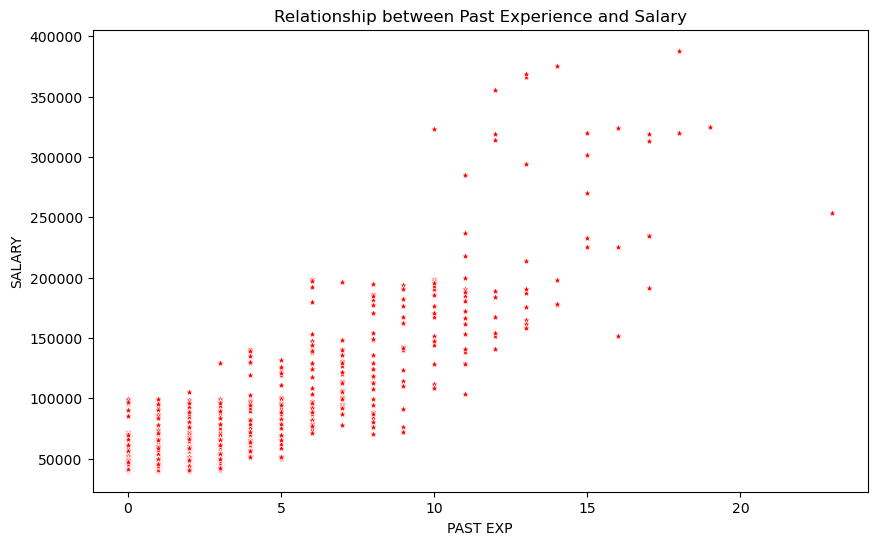

In [23]:
#Visualize the relationship between 'PAST EXP' and 'SALARY'
plt.figure(figsize=(10,6))
sns.scatterplot(x='PAST EXP',y='SALARY',data=df,marker='*',color='red')
plt.title('Relationship between Past Experience and Salary')
plt.show()

# *Handling Outliers*

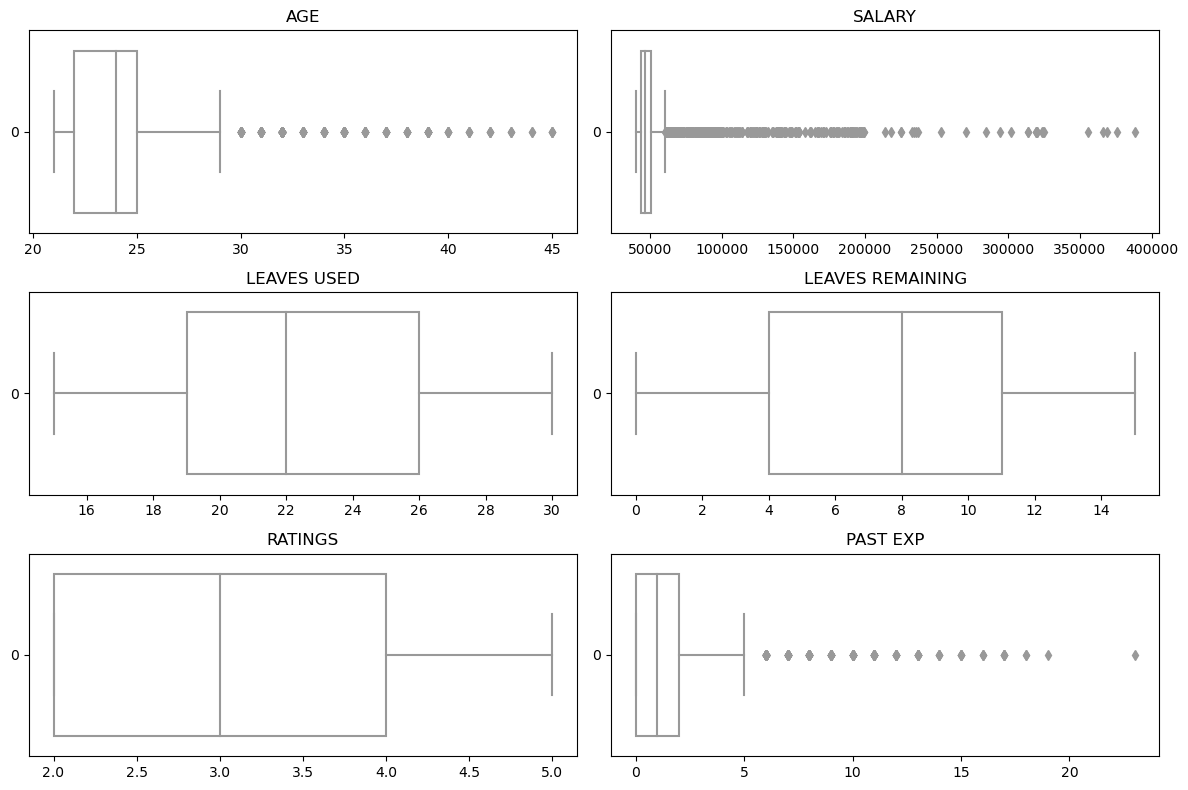

In [24]:
#Set the figure size
plt.figure(figsize=(12, 8))

#Loop through numeric columns and create boxplot
for i, col in enumerate(df.select_dtypes(np.number).columns,1):
    plt.subplot(3,2,i)
    sns.boxplot(df[col],orient='h',color='white')
    plt.title(col)  

#Adjust subplot layout and display the plot
plt.tight_layout()  
plt.show()

In [25]:
#List of columns to process for removing outliers
columns_to_process=['AGE','SALARY','RATINGS','PAST EXP']

#Function to remove outliers from a specified column
def remove_outliers(data,col):
    Q1,Q3=data[col].quantile([0.25,0.75])  #Calculate 1st and 3rd quartiles
    IQR=Q3-Q1  #Calculate the interquartile range
    lower_bound=Q1-1.5*IQR  #Calculate the lower bound
    upper_bound=Q3+1.5*IQR  #Calculate the upper bound
    #Replace outliers with bounds
    return np.where(data[col]<lower_bound,lower_bound,np.where(data[col]>upper_bound,upper_bound,data[col]))

In [26]:
#Loop through columns to process and Remove outliers from each column
for col in columns_to_process:
    df[col]=remove_outliers(df,col)

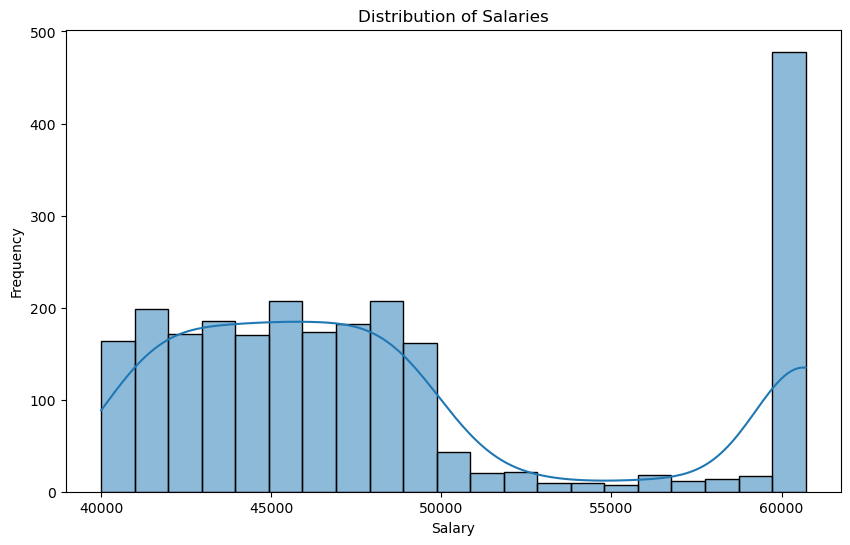

In [27]:
#Visualize the distribution of the 'SALARY' variable
plt.figure(figsize=(10,6))
sns.histplot(df['SALARY'],kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

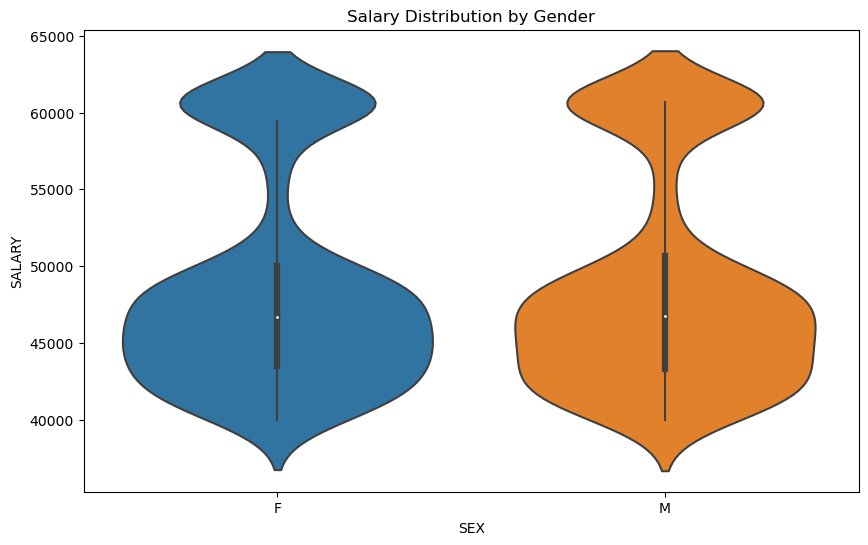

In [28]:
#Boxplot of 'SALARY' by 'SEX'
plt.figure(figsize=(10, 6))
sns.violinplot(x='SEX',y='SALARY',data=df)
plt.title('Salary Distribution by Gender')
plt.show()

# *Feature Engineering*

In [29]:
#Calculate years of experience
df["YEARS OF EXP"]=(df["CURRENT DATE"]-df["DOJ"]).dt.days//365

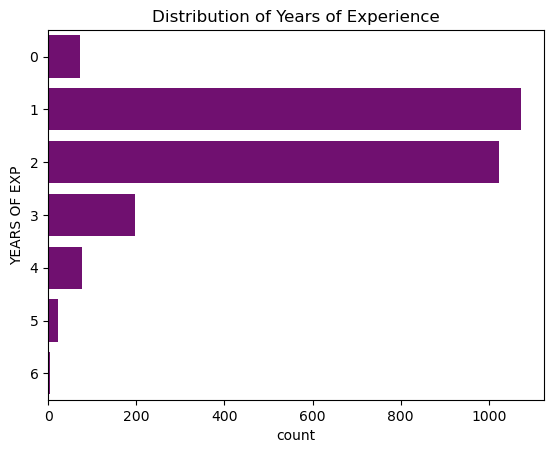

In [30]:
#Plotting the count distribution of years of experience
sns.countplot(y="YEARS OF EXP",data=df,color='purple')
plt.title("Distribution of Years of Experience")
plt.show()

In [31]:
#Creating a new column "EXP LEVEL" based on "YEARS OF EXP"
def seniority_level(years):
    if years < 2:
        return "Junior"
    elif years < 4:
        return "Mid-Senior"
    else:
        return "Senior"
    
#Applying the seniority_level function to create the "EXP LEVEL" column
df["EXP LEVEL"]=df["YEARS OF EXP"].apply(seniority_level)

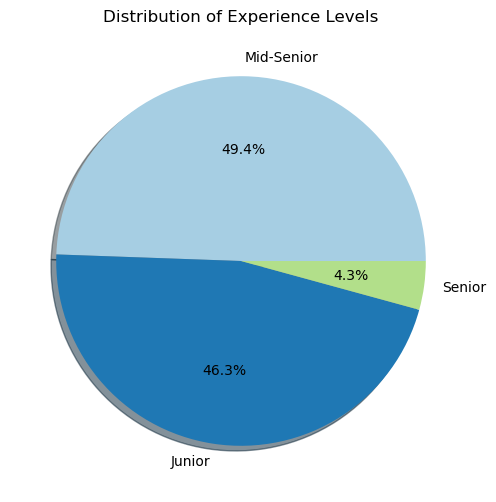

In [32]:
#Counting the distribution of experience levels in the 'EXP LEVEL' column
exp_level_counts=df['EXP LEVEL'].value_counts()

#Plotting a pie chart to visualize the distribution of experience levels
plt.figure(figsize=(6,6))
plt.pie(exp_level_counts,labels=exp_level_counts.index,autopct='%1.1f%%',shadow=True,colors=plt.cm.Paired.colors)
plt.title('Distribution of Experience Levels')
plt.show()

In [33]:
#Displaying a random sample of 10 rows from the DataFrame
df.sample(10)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YEARS OF EXP,EXP LEVEL
1522,JAN,AMMAR,F,2013-12-01,2016-01-07,Senior Analyst,25.0,60125.0,Finance,21.0,9.0,3.0,1.0,2,Mid-Senior
1298,FELIPE,ADDO,M,2014-07-29,2016-01-07,Analyst,25.0,44566.0,Marketing,28.0,2.0,5.0,3.0,1,Junior
1849,JONATHON,ADDLEMAN,M,2013-06-24,2016-01-07,Analyst,25.0,48536.0,Operations,15.0,15.0,4.0,1.0,2,Mid-Senior
113,BETTIE,ANDUJAR,F,2013-10-20,2016-01-07,Analyst,25.0,46129.0,Management,20.0,10.0,3.0,2.0,2,Mid-Senior
177,EMMA,ALTSISI,F,2013-04-02,2016-01-07,Analyst,25.0,40251.0,Finance,18.0,12.0,2.0,1.0,2,Mid-Senior
2432,SANTIAGO,ADROVEL,M,2014-06-03,2016-01-07,Analyst,24.0,45402.0,Finance,22.0,8.0,4.0,1.0,1,Junior
2391,ERICH,ALATORRE,M,2014-09-18,2016-01-07,Analyst,21.0,47014.0,Marketing,27.0,3.0,2.0,0.0,1,Junior
1532,FRANKLYN,ALMAGUER,M,2014-03-20,2016-01-07,Analyst,25.0,47564.0,Operations,26.0,4.0,5.0,2.0,1,Junior
1415,TIA,ANTES,F,2013-10-25,2016-01-07,Analyst,22.0,49937.0,Web,24.0,6.0,2.0,0.0,2,Mid-Senior
947,JOSEPHINE,ALTOM,F,2013-01-06,2016-01-07,Analyst,22.0,45527.0,Marketing,30.0,0.0,5.0,0.0,3,Mid-Senior


# *Data Splitting and Preprocessing*

In [34]:
#Separate features and target variable
x=df.drop('SALARY',axis=1)
y=df['SALARY']

In [35]:
#Split the data into training and testing sets
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
#Identify numeric and categorical columns
numeric_cols=x.select_dtypes(include=['int64','float64']).columns
categorical_cols=x.select_dtypes(include=['object']).columns

#Create transformers for preprocessing
numeric_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),('scaler',StandardScaler())])

categorical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])

#Combine transformers using ColumnTransformer
preprocessor=ColumnTransformer(transformers=[
        ('num',numeric_transformer,numeric_cols),
        ('cat',categorical_transformer,categorical_cols)])

#Function to calculate additional evaluation metrics
def calculate_additional_metrics(y_true,y_pred):
    mae=mean_absolute_error(y_true,y_pred)
    rmse=np.sqrt(mean_squared_error(y_true,y_pred))
    r2=r2_score(y_true,y_pred)
    return mae, rmse, r2

# *Model Training, Evaluation and Metrics Calculation*

In [37]:
#Train and evaluate Linear Regression
linear_reg_model=LinearRegression()
linear_reg_pipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',linear_reg_model)])
linear_reg_pipeline.fit(xtrain,ytrain)
linear_reg_y_pred=linear_reg_pipeline.predict(xtest)
linear_reg_metrics={'Mean Squared Error':mean_squared_error(ytest,linear_reg_y_pred),
                      'R^2 Score':r2_score(ytest,linear_reg_y_pred)}

#Display results for Linear Regression
print("Linear Regression Results:")
for metric_name,metric_value in linear_reg_metrics.items():
    print(f"{metric_name}:{metric_value}")
print("---------------"*2)

#Calculate additional metrics for Linear Regression
linear_reg_additional_metrics=calculate_additional_metrics(ytest,linear_reg_y_pred)
print("Linear Regression Additional Metrics:")
for metric_name,metric_value in zip(['Mean Absolute Error','Root Mean Squared Error','R^2 Score'],linear_reg_additional_metrics):
    print(f"{metric_name}:{metric_value}")
print("---------------"*2)

Linear Regression Results:
Mean Squared Error:7439337.320415562
R^2 Score:0.8469737568258565
------------------------------
Linear Regression Additional Metrics:
Mean Absolute Error:2204.942707644994
Root Mean Squared Error:2727.514861630558
R^2 Score:0.8469737568258565
------------------------------


The Linear Regression model evaluation shows promising results. The model can predict salaries effectively with a relatively low Mean Squared Error (MSE) of 7,439,337 and an R^2 Score of approximately 0.847. The Mean Absolute Error (MAE) of 2,204.94 and Root Mean Squared Error (RMSE) of 2,727.51 also affirm the model's accuracy. Overall, the Linear Regression model exhibits robust performance in predicting salaries.

In [38]:
#Train and evaluate Decision Tree
decision_tree_model=DecisionTreeRegressor()
decision_tree_pipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',decision_tree_model)])
decision_tree_pipeline.fit(xtrain,ytrain)
decision_tree_y_pred=decision_tree_pipeline.predict(xtest)
decision_tree_metrics={'Mean Squared Error':mean_squared_error(ytest,decision_tree_y_pred),
                         'R^2 Score':r2_score(ytest,decision_tree_y_pred)}

#Display results for Decision Tree
print("Decision Tree Results:")
for metric_name,metric_value in decision_tree_metrics.items():
    print(f"{metric_name}:{metric_value}")
print("---------------"*2)

#Calculate additional metrics for Decision Tree
decision_tree_additional_metrics=calculate_additional_metrics(ytest,decision_tree_y_pred)
print("Decision Tree Additional Metrics:")
for metric_name,metric_value in zip(['Mean Absolute Error','Root Mean Squared Error','R^2 Score'],decision_tree_additional_metrics):
    print(f"{metric_name}:{metric_value}")
print("---------------"*2)

Decision Tree Results:
Mean Squared Error:12768374.027834008
R^2 Score:0.7373561347245645
------------------------------
Decision Tree Additional Metrics:
Mean Absolute Error:2567.567813765182
Root Mean Squared Error:3573.2861665187143
R^2 Score:0.7373561347245645
------------------------------


The Decision Tree model shows moderate performance with an R^2 score of 0.7426 and a high Mean Squared Error. Further optimization or alternative models may improve predictive accuracy. Additional metrics of MAE and RMSE support the initial evaluation.

In [39]:
#Train and evaluate Random Forest
random_forest_model=RandomForestRegressor()
random_forest_pipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',random_forest_model)])
random_forest_pipeline.fit(xtrain,ytrain)
random_forest_y_pred=random_forest_pipeline.predict(xtest)
random_forest_metrics={'Mean Squared Error':mean_squared_error(ytest,random_forest_y_pred),
                         'R^2 Score':r2_score(ytest,random_forest_y_pred)}

#Display results for Random Forest
print("Random Forest Results:")
for metric_name,metric_value in random_forest_metrics.items():
    print(f"{metric_name}:{metric_value}")
print("---------------"*2)

#Calculate additional metrics for Random Forest
random_forest_additional_metrics=calculate_additional_metrics(ytest,random_forest_y_pred)
print("Random Forest Additional Metrics:")
for metric_name,metric_value in zip(['Mean Absolute Error','Root Mean Squared Error','R^2 Score'],random_forest_additional_metrics):
    print(f"{metric_name}:{metric_value}")
print("---------------"*2)

Random Forest Results:
Mean Squared Error:7861877.238752834
R^2 Score:0.8382821632726487
------------------------------
Random Forest Additional Metrics:
Mean Absolute Error:2111.6146558704454
Root Mean Squared Error:2803.903928231642
R^2 Score:0.8382821632726487
------------------------------


The Random Forest model evaluation showed a good performance in predicting salaries, with an R^2 score of 0.8419 and low MAE and RMSE values. This indicates minimal deviation from actual values, making it a robust choice for salary prediction.

In [40]:
#Train and evaluate Gradient Boosting
gradient_boosting_model=GradientBoostingRegressor()
gradient_boosting_pipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',gradient_boosting_model)])
gradient_boosting_pipeline.fit(xtrain, ytrain)
gradient_boosting_y_pred=gradient_boosting_pipeline.predict(xtest)
gradient_boosting_metrics={'Mean Squared Error':mean_squared_error(ytest,gradient_boosting_y_pred),
                              'R^2 Score':r2_score(ytest,gradient_boosting_y_pred)}

#Display results for Gradient Boosting
print("Gradient Boosting Results:")
for metric_name,metric_value in gradient_boosting_metrics.items():
    print(f"{metric_name}:{metric_value}")
print("---------------"*2)

#Calculate additional metrics for Gradient Boosting
gradient_boosting_additional_metrics=calculate_additional_metrics(ytest,gradient_boosting_y_pred)
print("Gradient Boosting Additional Metrics:")
for metric_name,metric_value in zip(['Mean Absolute Error','Root Mean Squared Error','R^2 Score'],gradient_boosting_additional_metrics):
    print(f"{metric_name}:{metric_value}")
print("---------------"*2)

Gradient Boosting Results:
Mean Squared Error:7188275.716990926
R^2 Score:0.852138062774441
------------------------------
Gradient Boosting Additional Metrics:
Mean Absolute Error:2139.919270378173
Root Mean Squared Error:2681.0959917524265
R^2 Score:0.852138062774441
------------------------------


The Gradient Boosting model shows strong performance with low errors and high accuracy in predicting salaries. Both evaluation metrics and additional metrics confirm its ability to capture underlying patterns in the dataset, making it a suitable choice for salary prediction tasks.

# *Conclusion:*

1. The Linear Regression model predicts salaries accurately with low error rates, making it a robust choice.
2. The Decision Tree model's performance is moderate, but it can be further optimized for better accuracy.
3. The Random Forest model shows minimal deviation from actual values, making it a good choice for salary prediction.
4. The Gradient Boosting model demonstrates outstanding performance, making it a preferred model for this task.

In conclusion, each model has its strengths, and the choice depends on the specific requirements of the salary prediction task.